In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [5]:
# Load dataset
mall_df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Step 1: Create target labels from Spending Score
def categorize_spending(score):
    if score < 40:
        return 'Low'
    elif score < 70:
        return 'Medium'
    else:
        return 'High'

In [7]:
mall_df['SpendingCategory'] = mall_df['Spending Score (1-100)'].apply(categorize_spending)


In [8]:
# Step 2: Encode categorical variables
label_encoder = LabelEncoder()
mall_df['Genre'] = label_encoder.fit_transform(mall_df['Genre'])  # Male: 1, Female: 0

In [9]:
# Step 3: Prepare features and target
X = mall_df[['Genre', 'Age', 'Annual Income (k$)']]
y = mall_df['SpendingCategory']

In [11]:
# Step 4: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 5: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [13]:
# Step 6: Predictions and Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

        High       0.50      1.00      0.67         6
         Low       1.00      0.67      0.80        15
      Medium       1.00      0.95      0.97        19

    accuracy                           0.85        40
   macro avg       0.83      0.87      0.81        40
weighted avg       0.93      0.85      0.86        40



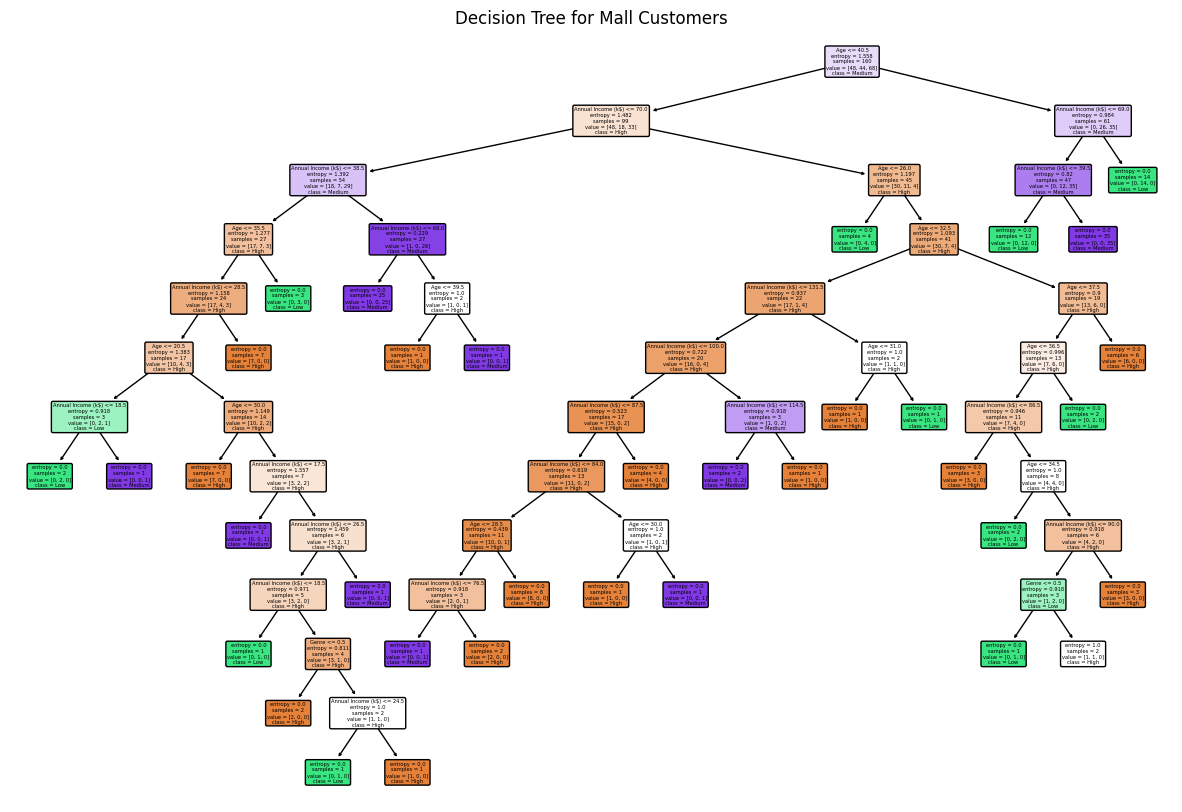

In [14]:
# Step 7 (Optional): Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Decision Tree for Mall Customers")
plt.show()